In [5]:
import os
import pandas as pd
import numpy as np
import json
#need pip install langcodes
# and pip install language_data
from langcodes import *
import matplotlib.pyplot as plt
import pycountry
from helpers import *
import pickle

%load_ext autoreload
%autoreload 2

In [ ]:
df_cen = load_data()

## Basic commands to understand better the data 
There are 39 features that are listed below.

We can also see that there are only 23081 out of 41727 that are unique.
In total there are 41727 rows, in which there are only 23081 unique `text`, and 27960 unique `text&timestamp&withheld_in_countries&lang`.

In [4]:
print(len(df_cen.columns))
print(df_cen.columns)
print(df_cen.dtypes)
features_bool = ['truncated', 'is_quote_status', 'favorited', 'retweeted']
features_count = ['quote_count', 'reply_count', 'retweet_count', 'favorite_count']
features_dates = ['created_at', 'timestamp_ms']
features_quoted = ['quoted_status_id', 'quoted_status_id_str','quoted_status', 'quoted_status_permalink']

39
Index(['created_at', 'id', 'id_str', 'text', 'display_text_range', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'withheld_in_countries', 'is_quote_status',
       'quote_count', 'reply_count', 'retweet_count', 'favorite_count',
       'entities', 'extended_entities', 'favorited', 'retweeted',
       'possibly_sensitive', 'filter_level', 'lang', 'timestamp_ms', 'linked',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'quoted_status_permalink', 'extended_tweet',
       'withheld_copyright'],
      dtype='object')
created_at                   datetime64[ns, UTC]
id                                         int64
id_str                                     int64
text                                      object
display_text_range                        ob

In [5]:
df_cen.iloc[:5,:20].head(5)

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,withheld_in_countries,is_quote_status,quote_count
0,2021-01-01 10:22:38+00:00,1344952164440027136,1344952164440027136,Berxwedana xelkê Şengalê a dijî peymana Iraq û...,"[0, 100]","<a href=""https://twitter.com/rojnewsku"" rel=""n...",False,NaN,NaN,NaN,NaN,None,"{'id': 2963674583, 'id_str': '2963674583', 'na...",NaN,NaN,None,NaN,[TR],False,0
1,2021-01-01 10:22:45+00:00,1344952193783357440,1344952193783357440,RT @CumSweatnTears: 🕷️ https://t.co/gcgKP5kV2w,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,NaN,None,"{'id': 3918070936, 'id_str': '3918070936', 'na...",NaN,NaN,None,NaN,[XX],False,0
2,2021-01-01 10:16:14+00:00,1344950553835671554,1344950553835671552,RT @ZaidZamanHamid: أنا لا أريد تخويفك، ولكن أ...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,None,"{'id': 963003026570121216, 'id_str': '96300302...",NaN,NaN,None,NaN,[IN],False,0
3,2021-01-01 10:16:14+00:00,1344950553835671554,1344950553835671552,RT @ZaidZamanHamid: أنا لا أريد تخويفك، ولكن أ...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,None,"{'id': 963003026570121216, 'id_str': '96300302...",NaN,NaN,None,NaN,[IN],False,0
4,2021-01-01 10:02:39+00:00,1344947135473717249,1344947135473717248,"RT @fatihakalan: Nedim Şener, açık açık @RTErd...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,NaN,None,"{'id': 869406746, 'id_str': '869406746', 'name...",NaN,NaN,None,NaN,[TR],True,0


In [6]:
df_cen.iloc[:5,20:].head(5)

,reply_count,retweet_count,favorite_count,entities,extended_entities,favorited,retweeted,possibly_sensitive,filter_level,lang,timestamp_ms,linked,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,withheld_copyright
0,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...","{'media': [{'id': 1344952160539312130, 'id_str...",False,False,1.0,low,tr,2021-01-01 10:22:38.662,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...","{'media': [{'id': 1343640995154460673, 'id_str...",False,False,1.0,low,und,2021-01-01 10:22:45.658,no,{'created_at': 'Mon Dec 28 19:32:51 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,False,False,NaN,low,ar,2021-01-01 10:16:14.664,no,{'created_at': 'Wed Dec 30 15:57:10 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,False,False,NaN,low,ar,2021-01-01 10:16:14.664,retweeted,{'created_at': 'Wed Dec 30 15:57:10 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,False,False,NaN,low,tr,2021-01-01 10:02:39.663,no,{'created_at': 'Thu Dec 31 23:08:51 +0000 2020...,1.344163e+18,1.344163e+18,{'created_at': 'Wed Dec 30 06:05:00 +0000 2020...,"{'url': 'https://t.co/nNXgYBnJ0G', 'expanded':...",NaN,NaN


In [7]:
df_cen.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,contributors,quote_count,reply_count,retweet_count,favorite_count,possibly_sensitive,quoted_status_id,quoted_status_id_str,withheld_copyright
count,4.172700e+04,4.172700e+04,1.058000e+03,1.058000e+03,1.089000e+03,1.089000e+03,0.0,41727.0,41727.0,41727.0,41727.0,9088.000000,3.713000e+03,3.713000e+03,290.0
mean,1.366049e+18,1.366049e+18,1.364930e+18,1.364930e+18,6.562730e+17,6.562730e+17,NaN,0.0,0.0,0.0,0.0,0.133473,1.354050e+18,1.354050e+18,1.0
std,7.452698e+15,7.452698e+15,2.850178e+16,2.850178e+16,5.889037e+17,5.889037e+17,NaN,0.0,0.0,0.0,0.0,0.340104,6.800711e+16,6.800711e+16,0.0
min,1.344912e+18,1.344912e+18,4.735386e+17,4.735386e+17,7.832140e+05,7.832140e+05,NaN,0.0,0.0,0.0,0.0,0.000000,1.683561e+17,1.683561e+17,1.0
25%,1.361092e+18,1.361092e+18,1.361765e+18,1.361765e+18,7.529377e+08,7.529377e+08,NaN,0.0,0.0,0.0,0.0,0.000000,1.358057e+18,1.358057e+18,1.0
50%,1.367062e+18,1.367062e+18,1.366562e+18,1.366562e+18,8.822788e+17,8.822788e+17,NaN,0.0,0.0,0.0,0.0,0.000000,1.363943e+18,1.363943e+18,1.0
75%,1.372052e+18,1.372052e+18,1.370652e+18,1.370652e+18,1.240601e+18,1.240601e+18,NaN,0.0,0.0,0.0,0.0,0.000000,1.371185e+18,1.371185e+18,1.0
max,1.377501e+18,1.377501e+18,1.377479e+18,1.377479e+18,1.373604e+18,1.373604e+18,NaN,0.0,0.0,0.0,0.0,1.000000,1.377335e+18,1.377335e+18,1.0


In [8]:
unique_text = len(df_cen.text.unique())
unique_rows = len(df_cen[['timestamp_ms', 'text', 'withheld_in_countries', 'lang']].apply(lambda x: str(x['timestamp_ms'])+x.text+x.lang+str(x.withheld_in_countries), axis=1).unique())
total = len(df_cen.text)
print("In total there are %d rows, in which there are only %d unique text, and %d unique text&timestamp."%(total, unique_text, unique_rows))

In total there are 41727 rows, in which there are only 23081 unique text, and 27960 unique text&timestamp.


Text(0.5, 1.0, 'Distribution of the number of times a text is in the DB in log-log_scale')

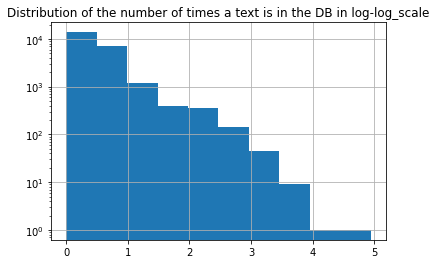

In [9]:
nb_of_duplicated_text = pd.DataFrame(df_cen.groupby('text').size()).reset_index().sort_values(by= 0, ascending = False)
most_freq_text = nb_of_duplicated_text.iloc[0].text
np.log(nb_of_duplicated_text[0]).hist( log = True).set_title("Distribution of the number of times a text is in the DB in log-log_scale")

In [10]:
df_cen[df_cen.text == most_freq_text]

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,lang,timestamp_ms,linked,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,withheld_copyright
140,2021-03-28 02:55:46+00:00,1376005063194378244,1376005063194378240,RT @EnesKanter: Thanos ? or maybe Jesus 🤔,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,en,2021-03-28 02:55:46.660,no,{'created_at': 'Sat Mar 27 22:09:56 +0000 2021...,1.375932e+18,1.375932e+18,{'created_at': 'Sat Mar 27 22:03:54 +0000 2021...,"{'url': 'https://t.co/xmd9BgFdBl', 'expanded':...",NaN,NaN
141,2021-03-28 02:55:46+00:00,1376005063194378244,1376005063194378240,RT @EnesKanter: Thanos ? or maybe Jesus 🤔,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,en,2021-03-28 02:55:46.660,retweeted,{'created_at': 'Sat Mar 27 22:09:56 +0000 2021...,1.375932e+18,1.375932e+18,{'created_at': 'Sat Mar 27 22:03:54 +0000 2021...,"{'url': 'https://t.co/xmd9BgFdBl', 'expanded':...",NaN,NaN
151,2021-03-28 02:57:25+00:00,1376005478430441474,1376005478430441472,RT @EnesKanter: Thanos ? or maybe Jesus 🤔,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,en,2021-03-28 02:57:25.660,no,{'created_at': 'Sat Mar 27 22:09:56 +0000 2021...,1.375932e+18,1.375932e+18,{'created_at': 'Sat Mar 27 22:03:54 +0000 2021...,"{'url': 'https://t.co/xmd9BgFdBl', 'expanded':...",NaN,NaN
152,2021-03-28 02:57:25+00:00,1376005478430441474,1376005478430441472,RT @EnesKanter: Thanos ? or maybe Jesus 🤔,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,en,2021-03-28 02:57:25.660,retweeted,{'created_at': 'Sat Mar 27 22:09:56 +0000 2021...,1.375932e+18,1.375932e+18,{'created_at': 'Sat Mar 27 22:03:54 +0000 2021...,"{'url': 'https://t.co/xmd9BgFdBl', 'expanded':...",NaN,NaN
159,2021-03-28 00:00:17+00:00,1375960901380145153,1375960901380145152,RT @EnesKanter: Thanos ? or maybe Jesus 🤔,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,en,2021-03-28 00:00:17.663,no,{'created_at': 'Sat Mar 27 22:09:56 +0000 2021...,1.375932e+18,1.375932e+18,{'created_at': 'Sat Mar 27 22:03:54 +0000 2021...,"{'url': 'https://t.co/xmd9BgFdBl', 'expanded':...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,2021-03-28 19:19:15+00:00,1376252564900081666,1376252564900081664,RT @EnesKanter: Thanos ? or maybe Jesus 🤔,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,en,2021-03-28 19:19:15.665,retweeted,{'created_at': 'Sat Mar 27 22:09:56 +0000 2021...,1.375932e+18,1.375932e+18,{'created_at': 'Sat Mar 27 22:03:54 +0000 2021...,"{'url': 'https://t.co/xmd9BgFdBl', 'expanded':...",NaN,NaN
632,2021-03-28 19:04:11+00:00,1376248773224108033,1376248773224108032,RT @EnesKanter: Thanos ? or maybe Jesus 🤔,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,en,2021-03-28 19:04:11.659,no,{'created_at': 'Sat Mar 27 22:09:56 +0000 2021...,1.375932e+18,1.375932e+18,{'created_at': 'Sat Mar 27 22:03:54 +0000 2021...,"{'url': 'https://t.co/xmd9BgFdBl', 'expanded':...",NaN,NaN
633,2021-03-28 19:04:11+00:00,1376248773224108033,1376248773224108032,RT @EnesKanter: Thanos ? or maybe Jesus 🤔,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,en,2021-03-28 19:04:11.659,retweeted,{'created_at': 'Sat Mar 27 22:09:56 +0000 2021...,1.375932e+18,1.375932e+18,{'created_at': 'Sat Mar 27 22:03:54 +0000 2021...,"{'url': 'https://t.co/xmd9BgFdBl', 'expanded':...",NaN,NaN
494,2021-03-29 12:52:44+00:00,1376517682632220675,1376517682632220672,RT @EnesKanter: Thanos ? or maybe Jesus 🤔,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,en,2021-03-29 12:52:44.658,no,{'created_at': 'Sat Mar 27 22:09:56 +0000 2021...,1.375932e+18,1.375932e+18,{'created_at': 'Sat Mar 27 22:03:54

Text(0.5, 1.0, 'Distribution of the number of times a text is in the DB in log-log_scale')

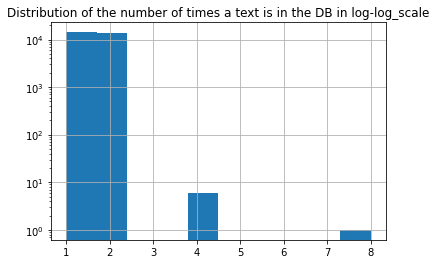

In [11]:
nb_of_duplicated = pd.DataFrame(df_cen.groupby(['timestamp_ms','created_at','text']).size()).reset_index().sort_values(by= 0, ascending = False)
nb_of_duplicated[0].hist( log = True).set_title("Distribution of the number of times a text is in the DB in log-log_scale")

In [12]:
df_cen.iloc[2:4]

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,lang,timestamp_ms,linked,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,withheld_copyright
2,2021-01-01 10:16:14+00:00,1344950553835671554,1344950553835671552,RT @ZaidZamanHamid: أنا لا أريد تخويفك، ولكن أ...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,ar,2021-01-01 10:16:14.664,no,{'created_at': 'Wed Dec 30 15:57:10 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-01 10:16:14+00:00,1344950553835671554,1344950553835671552,RT @ZaidZamanHamid: أنا لا أريد تخويفك، ولكن أ...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,ar,2021-01-01 10:16:14.664,retweeted,{'created_at': 'Wed Dec 30 15:57:10 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_cen_wo_duplicated = df_cen[['timestamp_ms','text']].drop_duplicates(keep='first')

duplicates = df_cen[['text']].duplicated(keep='first')
df_cen_unique_text = df_cen[~duplicates]

In [14]:
len(df_cen_wo_duplicated), len(df_cen_unique_text)

(27960, 23081)

In [15]:
df_cen = df_cen_unique_text

## Get insight where tweets are withhelded
We have tweets that are withhelded only from 7 countries that are Brazil, France, Germany, Israel, India, Russian Federation and Turkey


### Tweets withhelded in many countries
We had a country `whcs` that has the withhelded countries in `String`. 

We see that most of the tweets have only one country where it is withhelded. 

More over for tweet that are withhelded in 2 countries, there are only for pairs
- France, German
- German, Russia
- Brazil, XX 

where XX seems an undefined country. Maybe we will have to remove this country to make the analysis on Brazil.

In [16]:
df_cen['whcs'] = df_cen.withheld_in_countries.apply(lambda l : [get_name_country(c) for c in l]).apply(lambda x : ', '.join(x))

In [17]:
groups = df_cen.groupby('whcs').apply(len).index
countries = [x for x in list(df_cen.groupby('whcs').apply(len).index)  if ',' not in x]

<AxesSubplot:>

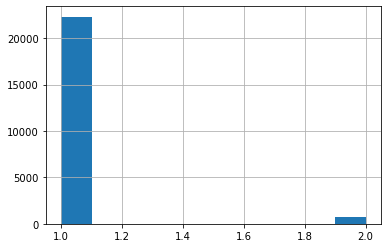

In [18]:
withheld_in_countries = df_cen[['text','withheld_in_countries']].copy()
withheld_in_countries['withheld_in_countries'] = withheld_in_countries['withheld_in_countries'].apply(list)
withheld_in_countries['nb_withheld_countries'] = withheld_in_countries['withheld_in_countries'].apply(len)
withheld_in_countries['nb_withheld_countries'].hist()

In [19]:
withheld_in_2_countries = withheld_in_countries[withheld_in_countries['nb_withheld_countries'] == 2].withheld_in_countries.apply(lambda l : [get_name_country(c) for c in l])
withheld_in_2_countries_count = withheld_in_2_countries.groupby(withheld_in_2_countries.apply(str)).apply(len)
withheld_in_2_countries_count

withheld_in_countries
['Brazil', 'Undefined']               33
['Germany', 'France']                675
['Germany', 'Russian Federation']     53
Name: withheld_in_countries, dtype: int64

## Look at XX country

In [20]:
language_of_XX = pd.DataFrame(df_cen[df_cen.withheld_in_countries.apply(lambda x : 'XX' in x)].groupby('lang').apply(len).sort_values(ascending = False)).reset_index()
language_of_XX['lang'] = language_of_XX['lang'].apply(lambda x : Language.get(x).display_name())
language_of_XX.head()

,lang,0
0,Unknown language,307
1,English,199
2,Portuguese,50
3,Spanish,41
4,Thai,26


## Language
Most of the withhelded tweets are in English, Urdu (language spoken in Pakistan), Turkish.

In [21]:
df_cen['language'] = df_cen['lang'].apply(lambda x : Language.get(x).display_name())
df_cen.groupby('language').apply(len).sort_values(ascending = False).head(10)

language
English             7984
Urdu                7208
Turkish             3875
Unknown language    1627
Arabic               347
German               232
French               230
Indonesian           230
Hindi                192
Spanish              147
dtype: int64

We construct a dataframe that duplicates the tweets that are withhelded in 2 countries so that when grouping by country we get all the tweets that were withhelded in this country independently if the tweets was withhelded in another country. We keep track on those with the `duplicated` feature. This is the `df_cen` extended that is named `df_cen_ext`.

In [23]:
df_cen_ext = flat_withhelded_countries(df_cen, keep_duplicates = True)

In [24]:
lang_repartition_by_whcs = pd.DataFrame(df_cen_ext.groupby(['whcs', 'language']).apply(len).sort_values(ascending = False)).reset_index()

whcs
India                          14182
Turkey                          5433
Germany                         1579
France                           934
Undefined                        901
Russian Federation               757
Germany, France                  675
Germany, Russian Federation       53
Brazil                            44
Brazil, Undefined                 33
Israel                            12
Name: 0, dtype: int64


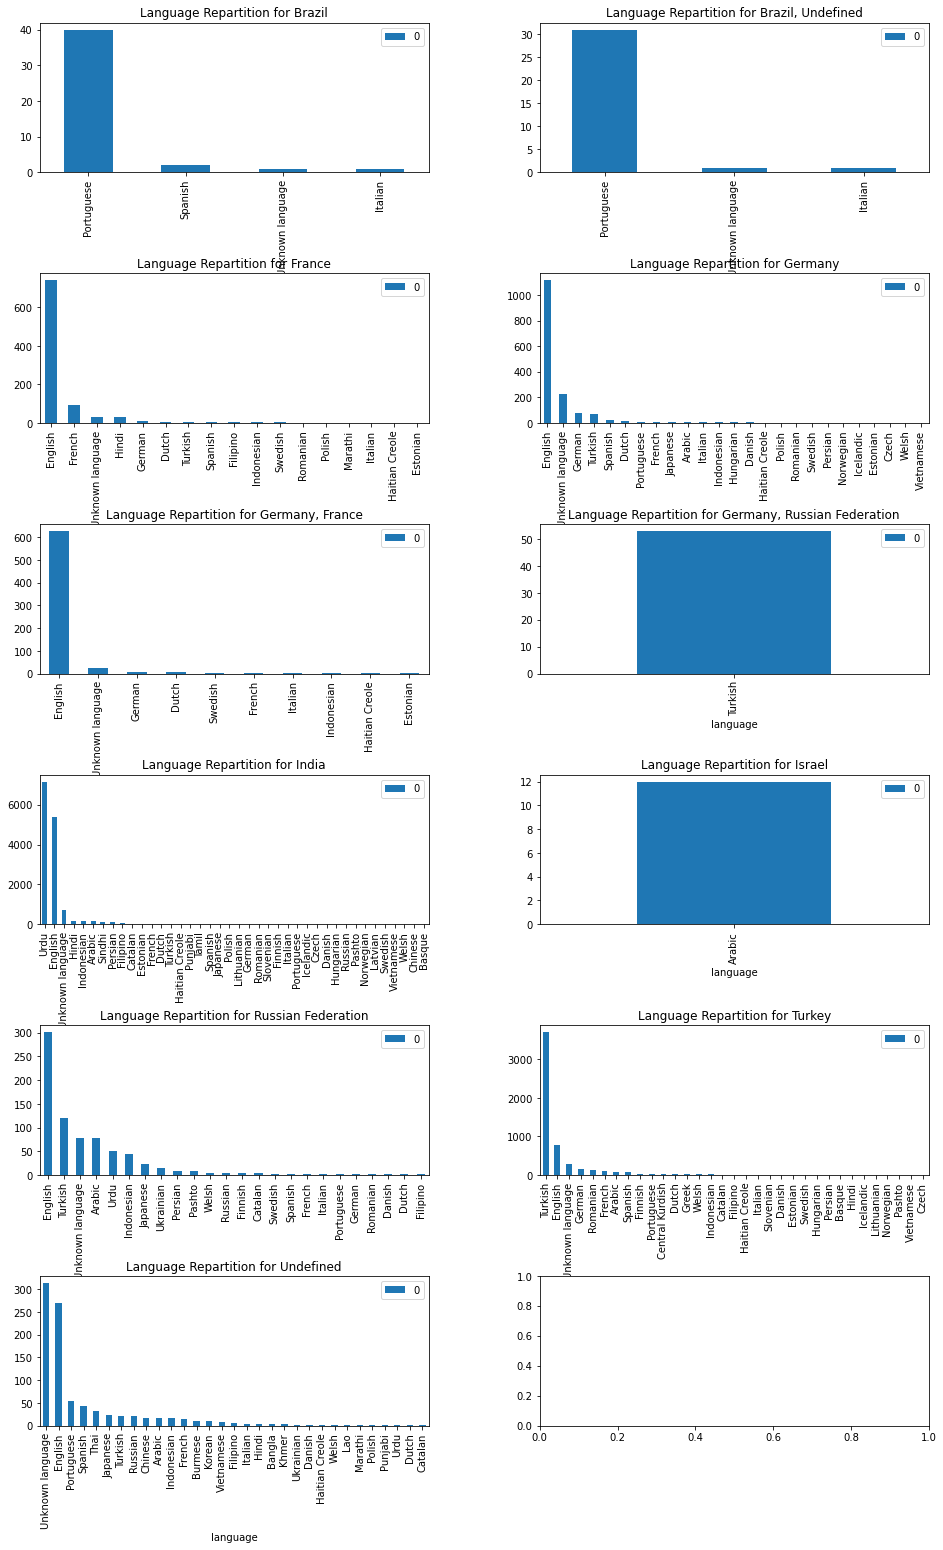

In [25]:
def show_language_repartition_for(country):
    lang_repartition_by_whcs[lang_repartition_by_whcs.whcs == country].plot.bar(x='language', y=0).set_title('Language Repartition for '+str(country))

print(lang_repartition_by_whcs.groupby('whcs')[0].apply(sum).sort_values(ascending = False))
fig, axs = plt.subplots((len(groups)+1)//2, 2, figsize = (15,22))
fig.tight_layout(pad=8.0)
axs = axs.ravel()
for i, country in enumerate(groups):
    lang_repartition_by_whcs[lang_repartition_by_whcs.whcs == country][[ 0, 'language']].plot(x = 'language', y = 0, ax=axs[i], kind='bar').set_title('Language Repartition for '+str(country))

### Check if language is right

After going through all Franch tweets, it seems right.

### Look at undefined language 

Most of them are only http links or only @ 

In [26]:
df_cen[df_cen.language == 'Unknown language']

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,linked,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,withheld_copyright,whcs,language
1,2021-01-01 10:22:45+00:00,1344952193783357440,1344952193783357440,RT @CumSweatnTears: 🕷️ https://t.co/gcgKP5kV2w,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,...,no,{'created_at': 'Mon Dec 28 19:32:51 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,Undefined,Unknown language
23,2021-01-01 11:11:32+00:00,1344964470540541952,1344964470540541952,@MylesCaggins https://t.co/NuTmPXytQi,"[13, 13]","<a href=""http://twitter.com/download/android"" ...",False,1.344792e+18,1.344792e+18,9.366895e+17,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Turkey,Unknown language
51,2021-01-01 09:25:34+00:00,1344937803151503360,1344937803151503360,RT @Slutty_Mona: 🎥 4 https://t.co/sbFkfsVzIX,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,...,no,{'created_at': 'Fri Jan 01 08:16:48 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,Undefined,Unknown language
54,2021-01-02 03:55:17+00:00,1345217072465371136,1345217072465371136,https://t.co/g7xDMyPGO9,"[0, 0]","<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Turkey,Unknown language
63,2021-01-02 01:22:57+00:00,1345178736552009728,1345178736552009728,6496229423368244152,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,NaN,NaN,NaN,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Undefined,Unknown language
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2021-03-31 12:01:15+00:00,1377229502179254272,1377229502179254272,RT @Mah_3z: #نمود_عشق \n\n@llillvf\n@INM786\n@...,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,...,no,{'created_at': 'Wed Mar 31 11:30:33 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,India,Unknown language
495,2021-03-31 12:52:56+00:00,1377242508690923520,1377242508690923520,RT @4_I_S: #نماز_قائم_کرو \n#PTI\n@zm_444\n@SM...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,no,{'created_at': 'Wed Mar 31 12:44:44 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,India,Unknown language
502,2021-03-31 12:36:58+00:00,1377238490564399105,1377238490564399104,RT @FaisalAlRehman: Pakistan 🇵🇰\nLovely Skardu...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,no,{'created_at': 'Wed Mar 31 12:13:03 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,India,Unknown language
526,2021-04-01 05:07:35+00:00,1377487787423846400,1377487787423846400,RT @isiilli: #نمود_عشق \n\n💚💚\n@llillvf\n@isii...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,no,{'created_at': 'Thu Apr 01 03:50:02 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,India,Unknown language


## See other features 
We can see that there are 18 features that have a lot of `NaN`. `contributors` is always `NaN` and should be deleted. There is only one entry where `geo` and `coordinates` are not `NaN`  

For countable features (i.e. `quote_count`, `reply_count`, `retweet_count`, `favorite_count`) all values are at $0$. Therefore these columns have no interest for us.

The dates `created at` and `timestamp_ms` seems to be exactly the same except the second one is more precise.  

`possibly_sensitive` takes only values in $\{0,1\}$ and should be transformed in boolean type 

`favorited` and `retweeted` are always `False` and should be deleted

`filter_level` is always `low` and should be deleted

In [27]:
total = len(df_cen)
print("There are %d tweets"%(total))
for col in df_cen.columns :
    nb_na = df_cen[col].isna().sum()
    if nb_na > 0 :
        print("Column %25s has in total %5d entries that are NaN "%(col, nb_na))


There are 23081 tweets
Column        display_text_range has in total 21516 entries that are NaN 
Column     in_reply_to_status_id has in total 22034 entries that are NaN 
Column in_reply_to_status_id_str has in total 22034 entries that are NaN 
Column       in_reply_to_user_id has in total 22006 entries that are NaN 
Column   in_reply_to_user_id_str has in total 22006 entries that are NaN 
Column   in_reply_to_screen_name has in total 22006 entries that are NaN 
Column                       geo has in total 23080 entries that are NaN 
Column               coordinates has in total 23080 entries that are NaN 
Column                     place has in total 23045 entries that are NaN 
Column              contributors has in total 23081 entries that are NaN 
Column         extended_entities has in total 19269 entries that are NaN 
Column        possibly_sensitive has in total 17479 entries that are NaN 
Column          retweeted_status has in total  2849 entries that are NaN 
Column         

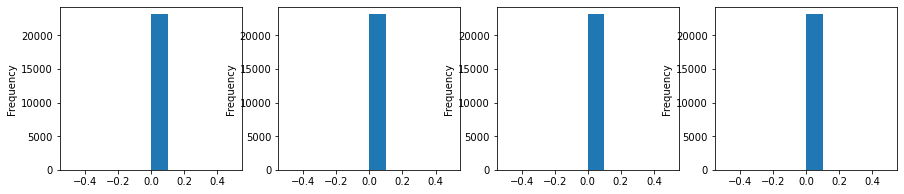

In [28]:
fig, axs = plt.subplots(1, 4, figsize = (15,3))
axs = axs.ravel()
for i, f in enumerate(features_count):
    df_cen[f].plot(ax = axs[i], kind = 'hist')

,created_at,timestamp_ms
0,2021-01-01 10:22:38+00:00,2021-01-01 10:22:38.662
1,2021-01-01 10:22:45+00:00,2021-01-01 10:22:45.658
2,2021-01-01 10:16:14+00:00,2021-01-01 10:16:14.664
4,2021-01-01 10:02:39+00:00,2021-01-01 10:02:39.663
6,2021-01-01 10:14:33+00:00,2021-01-01 10:14:33.658
...,...,...
672,2021-04-01 04:37:37+00:00,2021-04-01 04:37:37.657
673,2021-04-01 04:08:48+00:00,2021-04-01 04:08:48.659
674,2021-04-01 04:40:48+00:00,2021-04-01 04:40:48.657
676,2021-04-01 04:51:54+00:00,2021-04-01 04:51:54.660


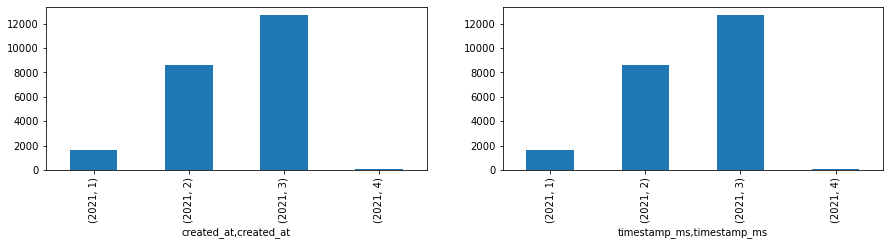

In [29]:
fig, axs = plt.subplots(1, 2, figsize = (15,3))
axs = axs.ravel()
df_cen.created_at.groupby([df_cen["created_at"].dt.year, df_cen["created_at"].dt.month]).count().plot(ax = axs[0], kind="bar")
df_cen.created_at.groupby([df_cen["timestamp_ms"].dt.year, df_cen["timestamp_ms"].dt.month]).count().plot(ax = axs[1], kind="bar")
df_cen[['created_at', 'timestamp_ms']]

In [30]:
for feat in features_bool :
    print(df_cen.groupby(feat).apply(len), '\n')

truncated
False    22063
True      1018
dtype: int64 

is_quote_status
False    21148
True      1933
dtype: int64 

favorited
False    23081
dtype: int64 

retweeted
False    23081
dtype: int64 



In [31]:
print(df_cen.groupby('possibly_sensitive').apply(len), '\n')
df_cen[df_cen.possibly_sensitive.notna()][['possibly_sensitive', 'withheld_in_countries', 'text' ]]

possibly_sensitive
0.0    4781
1.0     821
dtype: int64 



,possibly_sensitive,withheld_in_countries,text
0,1.0,[TR],Berxwedana xelkê Şengalê a dijî peymana Iraq û...
1,1.0,[XX],RT @CumSweatnTears: 🕷️ https://t.co/gcgKP5kV2w
14,0.0,[FR],RT @AlainSoralOffic: Soral répond épisode 23 :...
17,1.0,[DE],"Und noch ein Video verkauft! Schau dir ""schwar..."
23,0.0,[TR],@MylesCaggins https://t.co/NuTmPXytQi
...,...,...,...
633,0.0,[TR],RT @KurdistanAu: Demirtaş: Ce n'est pas le HDP...
635,0.0,[TR],RT @KronosHaber: Cezaevinde koronavirüse yakal...
649,0.0,[TR],RT @ANHA_TR_yedek: #Hol Kampı’nda yeni patlayı...
658,0.0,[TR],RT @mutludc: US-backed Syrian Kurdish forces d...


## Users

In [32]:
df_cen.iloc[0].user

{'id': 2963674583,
 'id_str': '2963674583',
 'name': 'Rojnews Kurmancî',
 'screen_name': 'kurmancirojnews',
 'location': None,
 'url': 'https://rojnews.news/ku',
 'description': 'Ajansa nûçeyan a Başûrê Kurdistanê.',
 'translator_type': 'none',
 'protected': False,
 'verified': False,
 'followers_count': 40283,
 'friends_count': 1,
 'listed_count': 53,
 'favourites_count': 0,
 'statuses_count': 41733,
 'created_at': 'Tue Jan 06 07:59:37 +0000 2015',
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'profile_background_color': 'C0DEED',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_tile': False,
 'profile_link_color': '1DA1F2',
 'profile_sidebar_border_color': 'C0DEED',
 'profile_sidebar_fill_color': 'DDEEF6',
 'profile_text_color': '333333',
 'profile_

In [33]:
df_cen['user_name'] = df_cen.apply(lambda x : x.user['name'], axis = 1)
df_cen.groupby('user_name').apply(len).sort_values(ascending = False)

user_name
🇵🇱LaureenPink ™©ONLYFANS-Girl🇵🇱    361
افضال احمد                         298
Maqbool Ahmad                      231
Murteza Haçkalı 1461               225
Muhammad nawaz sunpal              188
                                  ... 
Mal 🌞                                1
Makhdoom Raheel                      1
Maj. Neddy                           1
Maica                                1
🦴 زندہ_لاش 👀                         1
Length: 7202, dtype: int64

<AxesSubplot:>

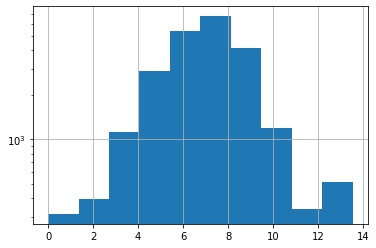

In [34]:
df_cen.user.apply(lambda x : np.log(x['followers_count']+1)).hist(log = True)

In [35]:
df_cen.groupby('filter_level').apply(len)

filter_level
low    23081
dtype: int64

In [36]:
df_cen.iloc[0].extended_entities

{'media': [{'id': 1344952160539312130,
   'id_str': '1344952160539312130',
   'indices': [101, 124],
   'media_url': 'http://pbs.twimg.com/media/Eqo63TjXAAI_59U.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/Eqo63TjXAAI_59U.jpg',
   'url': 'https://t.co/3X9XzfCaAO',
   'display_url': 'pic.twitter.com/3X9XzfCaAO',
   'expanded_url': 'https://twitter.com/kurmancirojnews/status/1344952164440027136/photo/1',
   'type': 'photo',
   'sizes': {'small': {'w': 680, 'h': 340, 'resize': 'fit'},
    'large': {'w': 750, 'h': 375, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 750, 'h': 375, 'resize': 'fit'}}}]}

In [37]:
for feat in features_quoted :
    print(feat, df_cen[df_cen[feat].notna()].iloc[0][feat], '\n')

quoted_status_id 1.3441625515721318e+18 

quoted_status_id_str 1.3441625515721318e+18 

quoted_status {'created_at': 'Wed Dec 30 06:05:00 +0000 2020', 'id': 1344162551572131841, 'id_str': '1344162551572131841', 'text': 'Nedim Şener: 15 Temmuz başarılı olsaydı, Muhsin Yazıcıoğlu dosyası Erdoğan ve Hakan Fidan’ın yargılanacağı bir kump… https://t.co/Jlpo1OJXu9', 'display_text_range': [0, 140], 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'truncated': True, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 80549263, 'id_str': '80549263', 'name': 'T24', 'screen_name': 't24comtr', 'location': 'Türkiye', 'url': 'http://t24.com.tr', 'description': 'Bağımsız İnternet Gazetesi\nhttp://facebook.com/T24comtr\nhttp://instagram.com/T24comtr\nhttp://youtube.com/T24comtr', 'translator_type': 'regular', 'protected': False, 've

### IDs 

It seems that ID and IS_STR are not always the same 

In [41]:
len(df_cen[df_cen['id']!=df_cen['id_str']])

17588

## Conlusion 

We remove the unnecessary columns and change the type of `possibly_sensitive`. 

We finally save the edaprocessed df in memory

In [ ]:
df_final = eda_processing(df_cen)

In [45]:
df_final.to_pickle('data/df_cen_eda_processed')